**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

# 1. Data Exploration

 ## 1.1. Imports

In [4]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [5]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # import seaborn as sns

## 1.2 Loading Data

In [6]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
25825,25826,NLD,62.0,921,0x63FFFC4F259C7FDC3DFA66A37AA65FA02B8B356A308F...,0x55A4A4A8BAB703D7C280435A1D1E783793EB8718819D...,75,332.0,72.0,0,0,1,8,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
50667,50668,DEU,43.0,563,0x3FBA200F6E7D876E4C52201D4D9F83BCE5FE0273686A...,0x564ED1A434E67EDFD2A0DA2F61BC71F33E70E242B650...,187,2078.4,367.0,0,0,1,14,7,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
26496,26497,DEU,49.0,910,0xBE41A944D2C7C99777235366ED592F47AE146DAFCA9F...,0x58BB5E547CFBCF8C8EF53CFC5D60181B61A5284B8CBB...,120,567.8,383.9,0,0,1,14,7,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
28301,28302,FRA,45.0,884,0x351AC7A47C59327167E448D191684E07ACBAC4492411...,0x0CBAC2D9E548C3C7BE63CE3E61C73EBCA1C2CEB50501...,7,280.0,170.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
11530,11531,CHE,28.0,1168,0xAE1D4ADBD4A766C3DA594B5A7E80B074DF4E3079B825...,0xDB634D76BB1D697C589A7990B4FAE2C8438D0EDBFECC...,173,93.3,14.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


## 1.3. Initial Analysis

### 1.3.1. Types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 1.3.2. Missing values

In [10]:
data.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### 1.3.3. Duplicates

In [11]:
# Checking if we have duplicated IDs
data[data.index.duplicated() == True]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### 1.3.4. Statistics

In [12]:
# Maybe Separate even more
data_num = data.select_dtypes(exclude = object)
data_cat = data.select_dtypes(include = object)

In [13]:
data_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.03,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.83,85.12,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.85,379.13,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.68,123.58,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.20,2.30,0.0,0.0,2.0,3.0,185.00


In [14]:
data_cat.describe().T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


In [15]:
# Separating binary columns
data_bin = data[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
                 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
                 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]
data_num = data_num.drop(columns=data_bin.columns)


# Data Exploration

## Objectives
* Targeted Marketing: Develop tailored campaigns for specific customer groups to improve engagement and conversions.

* Personalised Offers: Create customized promotions and packages to boost satisfaction and loyalty.

* Service Customisation: Tailor amenities and services to meet the unique needs of different segments.

* Customer Retention: Retain high-value or loyal customers by addressing their preferences.

* Pricing Strategies: Implement dynamic pricing based on segment willingness to pay and booking behavior.

* Identify High-Value Segments: Focus on the most profitable customers to maximize revenue.

* Resource Allocation: Efficiently allocate resources (staff, budget, inventory) based on segment demand.

* Market Positioning: Refine the hotel’s market position using segmentation insights to attract the right customers.

* Competitive Advantage: Differentiate offerings to stand out in the market.

* Predictive Analytics: Use data to anticipate future customer behavior and trends for proactive decision-making.

## Data Distribution

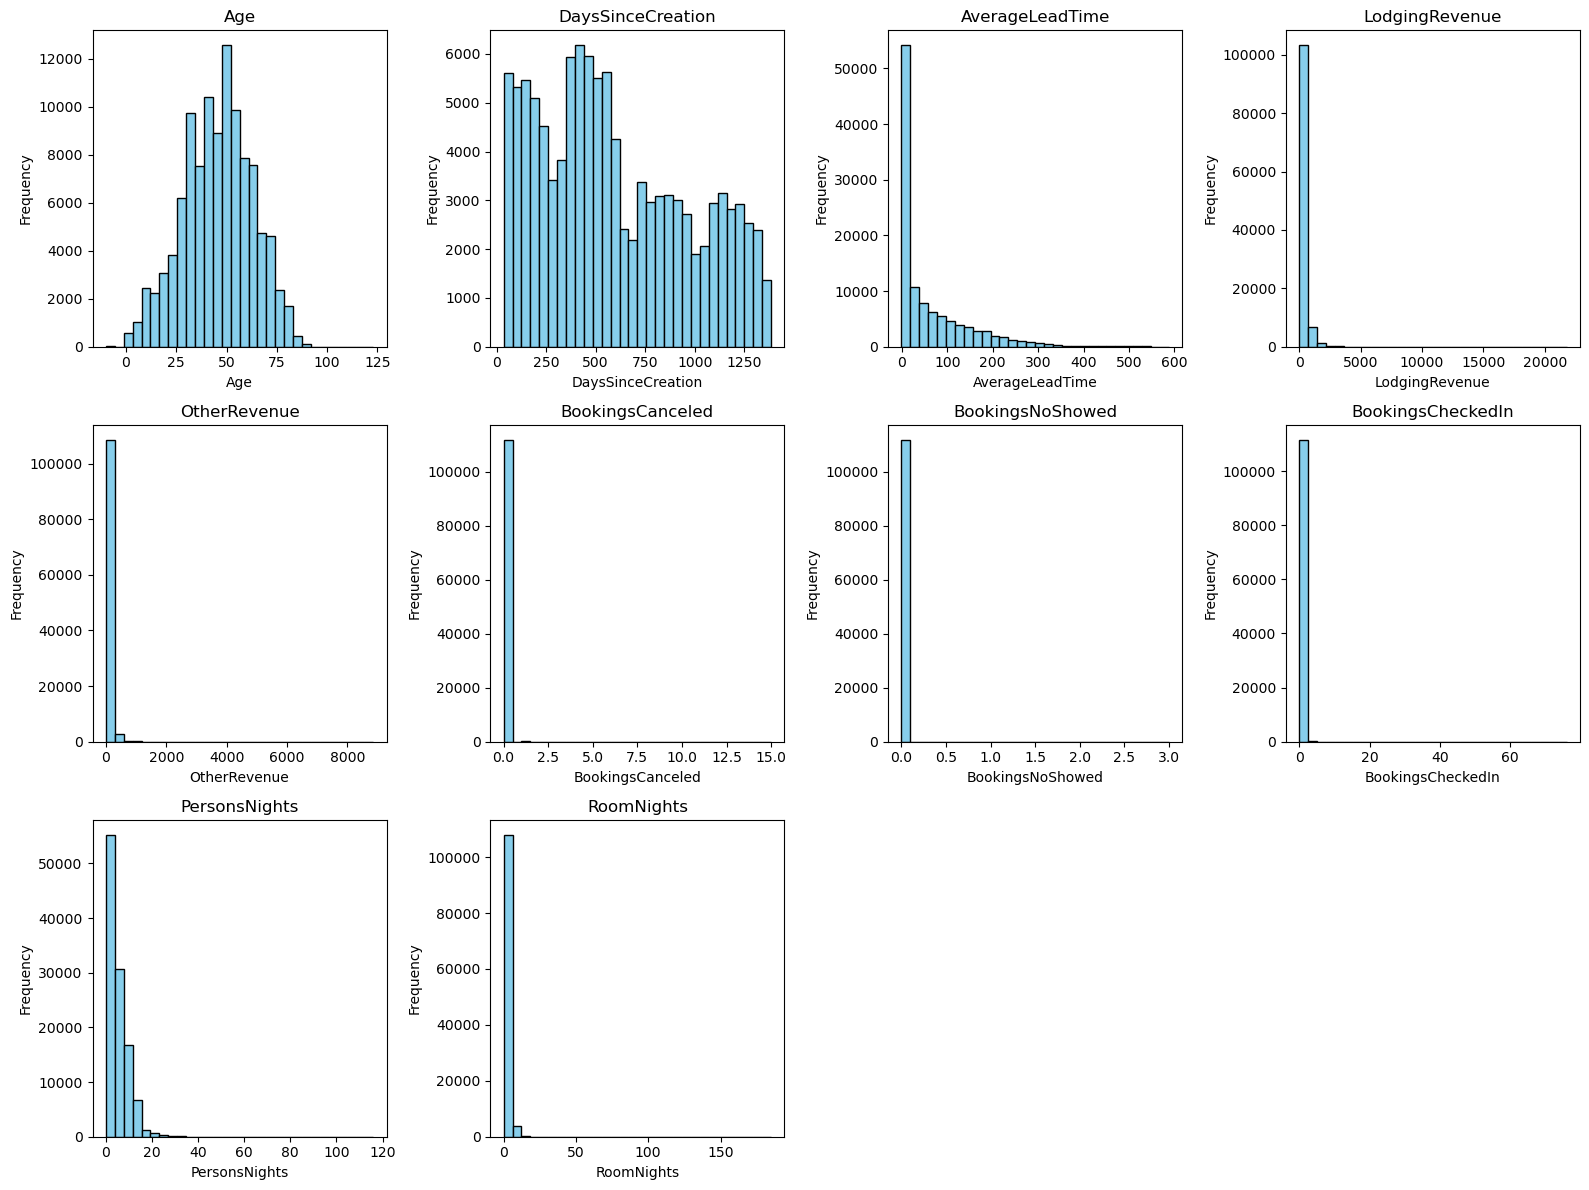

In [16]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through numerical columns and create histograms
for i, col in enumerate(data_num):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


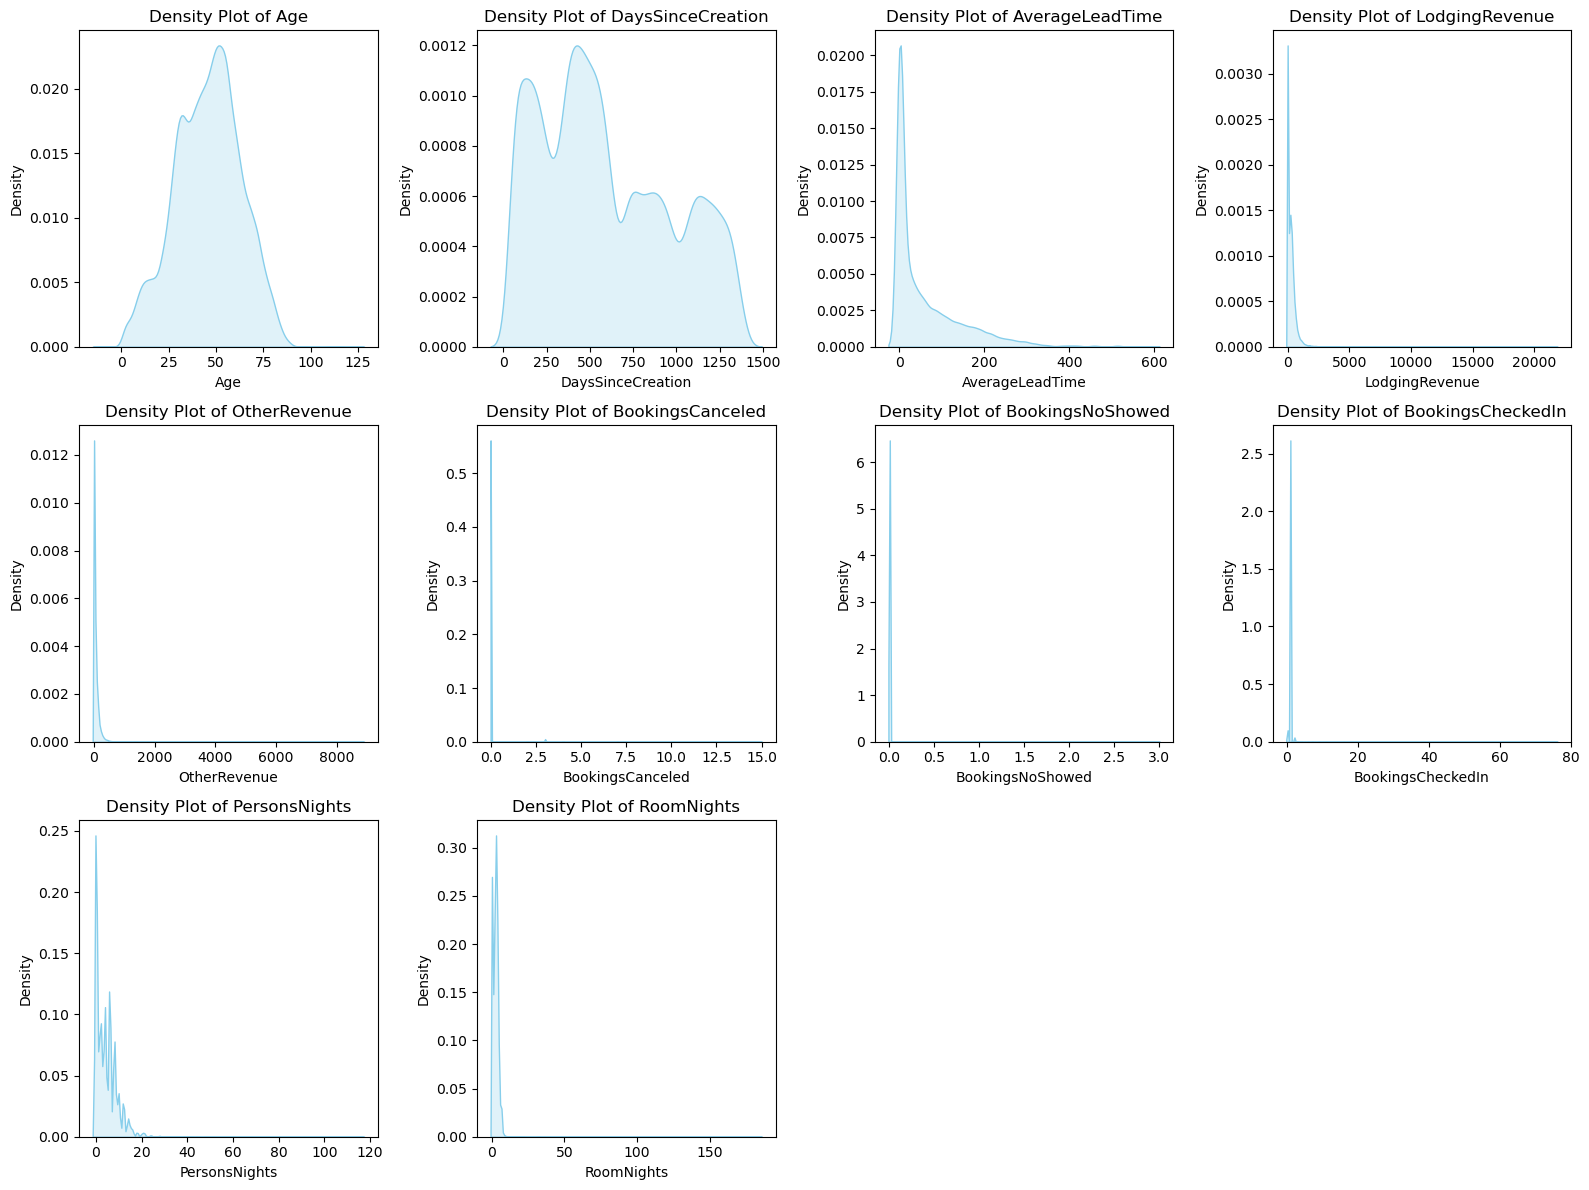

In [17]:
# Set up the grid layout (adjust rows/cols based on the number of features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make it easier to iterate

# Loop through numerical columns and plot KDE (density) for each
for i, col in enumerate(data_num):
    sns.kdeplot(data[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


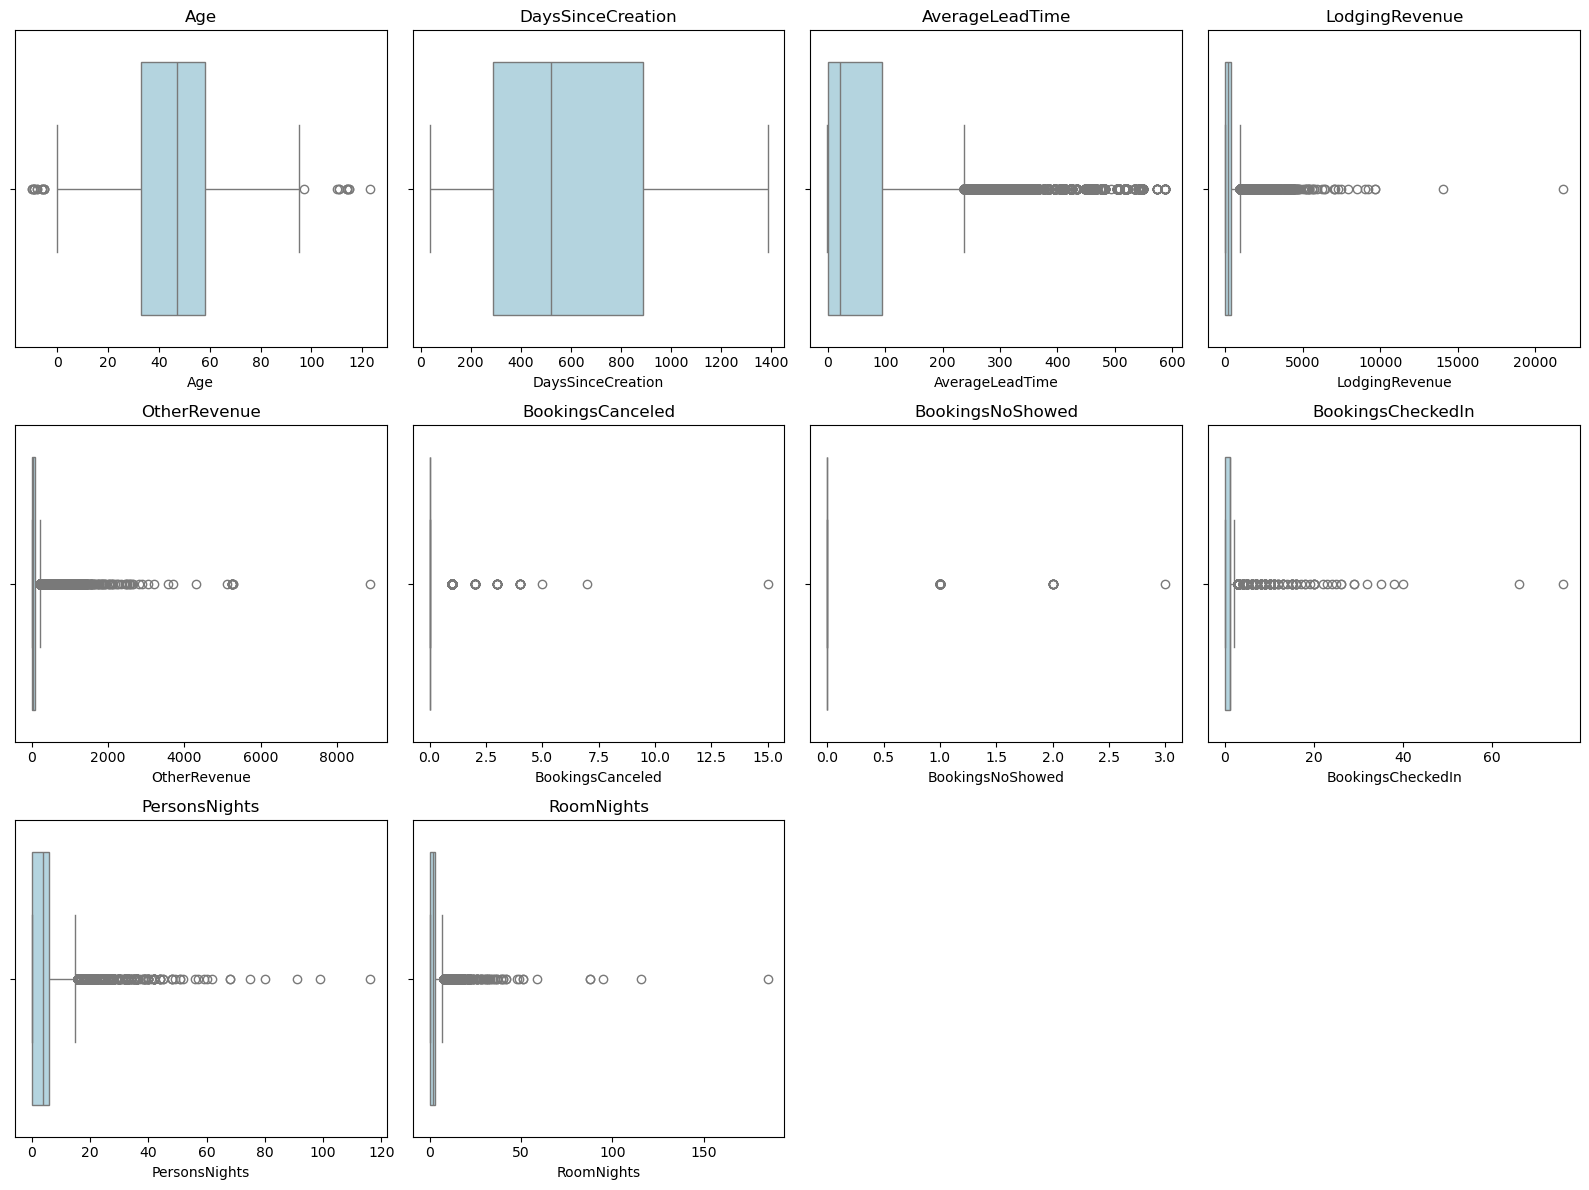

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_num):
    sns.boxplot(x=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [19]:

# Filter out rows where any numerical column has a value less than 0
data_cleaned = data[(data[data_num.columns] >= 0).all(axis=1)]

# Check the shape of the cleaned data to see how many rows are removed
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (111733, 28)
Cleaned data shape: (107535, 28)


### How many rows have zero information?

In [20]:
data_num.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights'],
      dtype='object')

In [21]:
# Choosing the columns to verify
data_zeroinfo = data_num[['LodgingRevenue','OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','BookingsCheckedIn', 'PersonsNights', 'RoomNights']]

In [22]:
check_df= []
for index, row in data_zeroinfo.iterrows():
    if sum(row) == 0:
        check_df.append(data.loc[index])
check_df = pd.DataFrame(check_df)
        

In [23]:
check_df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,1,1,0,0,0
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


### Going Through Variables

#### SRFloor
Making a fusion with the low-high floor 

    If its on a low floor then 1 
    If its on a medium floor then 2
    If its on a high floor then 3

In [24]:
Check0 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check0

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [25]:
# We have 1 customer that usually asks fot a high and low floor but not medium and the same for the cases bellow
Check1 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26127,PRT,NaN,916,0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,74,506.25,92.5,0,0,1,15,5,Direct,Direct,1,1,0,0,0,0,0,1,0,0,0,0,1


In [26]:
Check2 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 1)]
Check2

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...,0xB524FBB5D5127698F6E182836043FBA8CCD397612416...,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,Other,1,0,0,1,0,0,0,1,0,0,0,0,0


In [27]:
Check3 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check3

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...,0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,Other,0,1,0,1,0,0,0,0,0,0,0,0,1


In [28]:
# This just means that the customer does not ask for a specific floor
Check4 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 0)]
Check4

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


Uncomment the code after we dealt with the costumers above and if everyone agrees

In [29]:
def type_of_floor(row):
     if row['SRMediumFloor'] == 1 and row['SRHighFloor'] == 1:
            return 4
     elif row['SRLowFloor'] == 1 and row['SRMediumFloor'] == 1:
         return 4
     elif row['SRLowFloor'] == 1:     # preference for lower floors
         return 1
     elif row['SRMediumFloor'] == 1: # preference for medium floors
         return 2
     elif row['SRHighFloor'] == 1:    # preference for higher floors
         return 3
     else:                           # no preference
         return 0 



data['SRFloor'] = data.apply(type_of_floor, axis=1)

In [40]:
data['SRFloor'].value_counts()

SRFloor
0    106754
3      4748
1       145
2        84
4         2
Name: count, dtype: int64

In [30]:
# Getting the percentage of every number in SRFloor
data['SRFloor'].value_counts(normalize=True)

SRFloor
0    0.955438
3    0.042494
1    0.001298
2    0.000752
4    0.000018
Name: proportion, dtype: float64

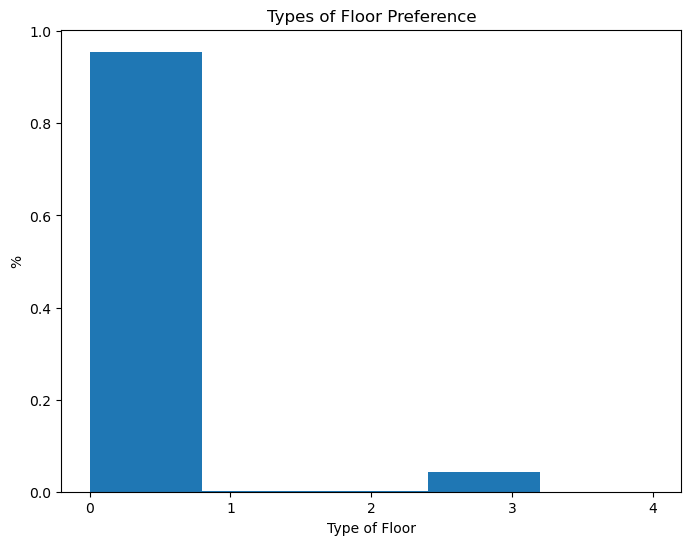

In [31]:
# Plot of types of floors preference 
# This plot could get some improvements 

plt.figure(figsize=(8, 6))
plt.hist(data['SRFloor'], bins=5, weights=[1 / len(data['SRFloor'])] * len(data['SRFloor']))
plt.title('Types of Floor Preference')
plt.xticks(range(5))
plt.xlabel('Type of Floor')
plt.ylabel('%')
plt.show()

It's to many people maybe we can use this for clustering and create something that will make they come to the hotel

#### Age
##### Missing Values

For this we should only worry with the age

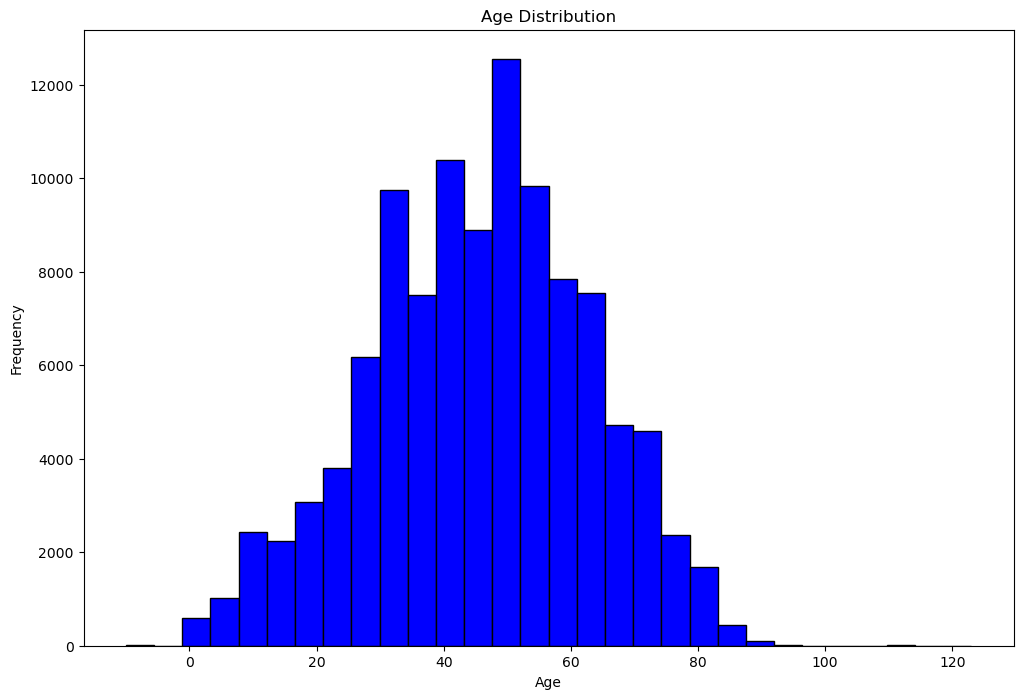

In [32]:
plt.figure(figsize=(12, 8))
plt.hist(data['Age'], bins=30, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


We should clip the ages under 18 to be the median or just 18 and the ages above 110 to be 100 or something like that

In [33]:
# clipping ages lower than 18 and higher than 110

print(data['Age'].median())
data['Age'] = data['Age'].clip(18, 110)

47.0


In [34]:
data['Age'].median()

47.0

The median is still the same

In [35]:
# Looking to rows where age is lower than 18

data[data['Age'] < 18]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,SRFloor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Days Since Creation

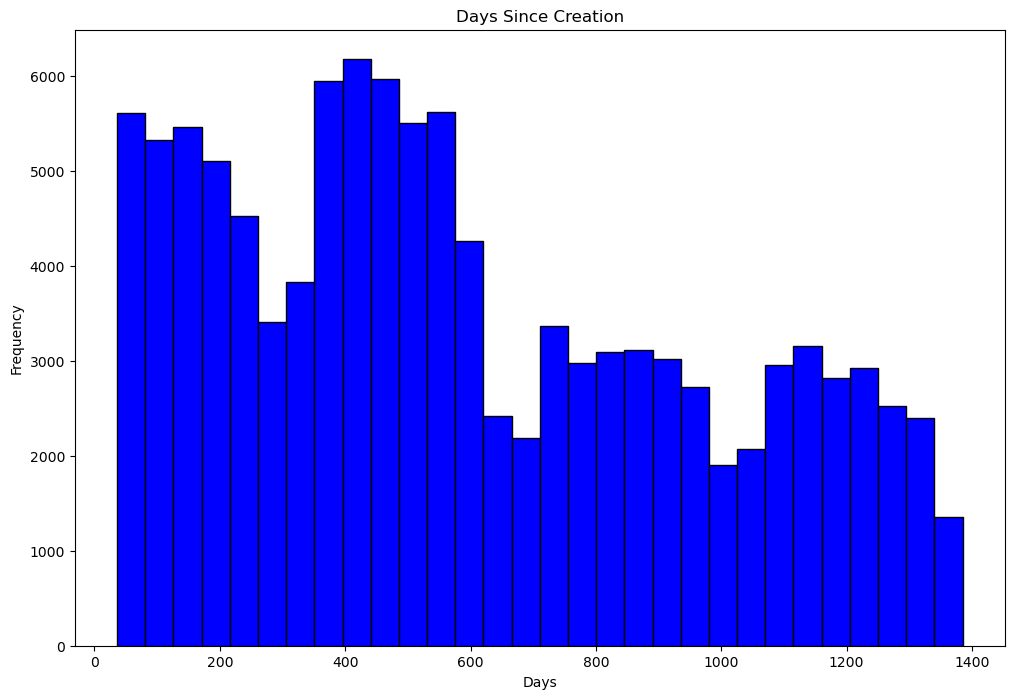

In [36]:
plt.figure(figsize=(12, 8))
plt.hist(data['DaysSinceCreation'], bins=30, color='blue', edgecolor='black')
plt.title('Days Since Creation')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

#### Average Lead Time

Average number of days before arrival date the costumer makes bookings

In [41]:
data['AverageLeadTime'].value_counts()

AverageLeadTime
0      36678
1       2121
2       1271
6       1257
4       1224
       ...  
474        1
425        1
424        1
361        1
380        1
Name: count, Length: 424, dtype: int64

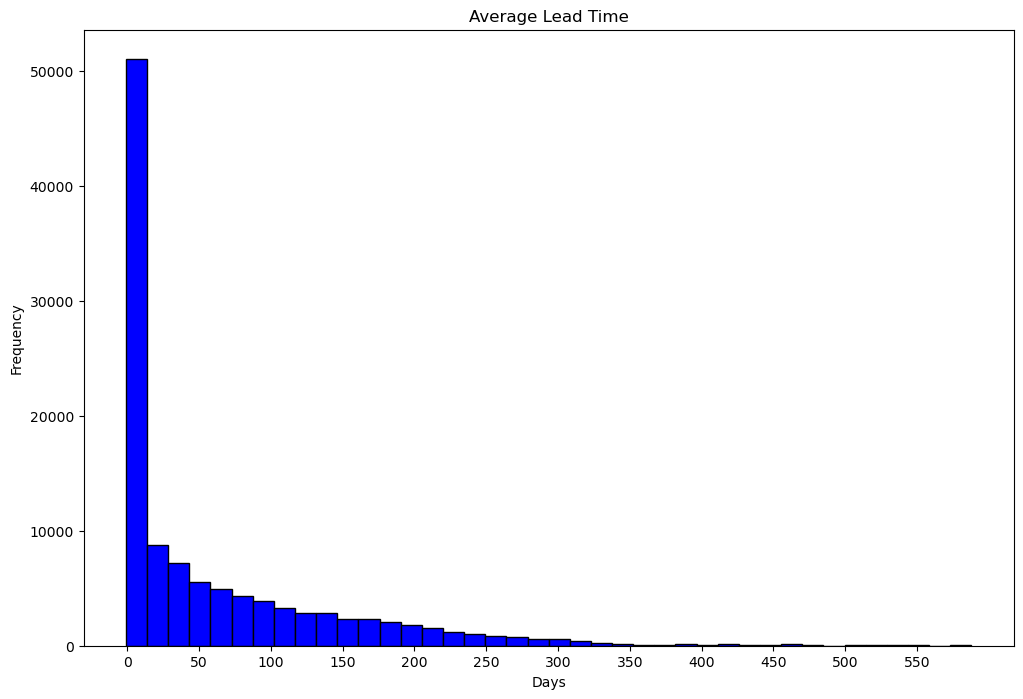

In [37]:
plt.figure(figsize=(12, 8))
plt.hist(data['AverageLeadTime'],bins=40 , color='blue', edgecolor='black')
plt.title('Average Lead Time') 
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(range(0, 600, 50))
plt.show()

#### Lodging Revenue

In [ ]:
data_num['LodgingRevenue'].value_counts()

LodgingRevenue
0.00      33769
176.00      988
126.00      673
234.00      592
264.00      551
          ...  
605.10        1
846.16        1
421.68        1
391.28        1
173.55        1
Name: count, Length: 12689, dtype: int64

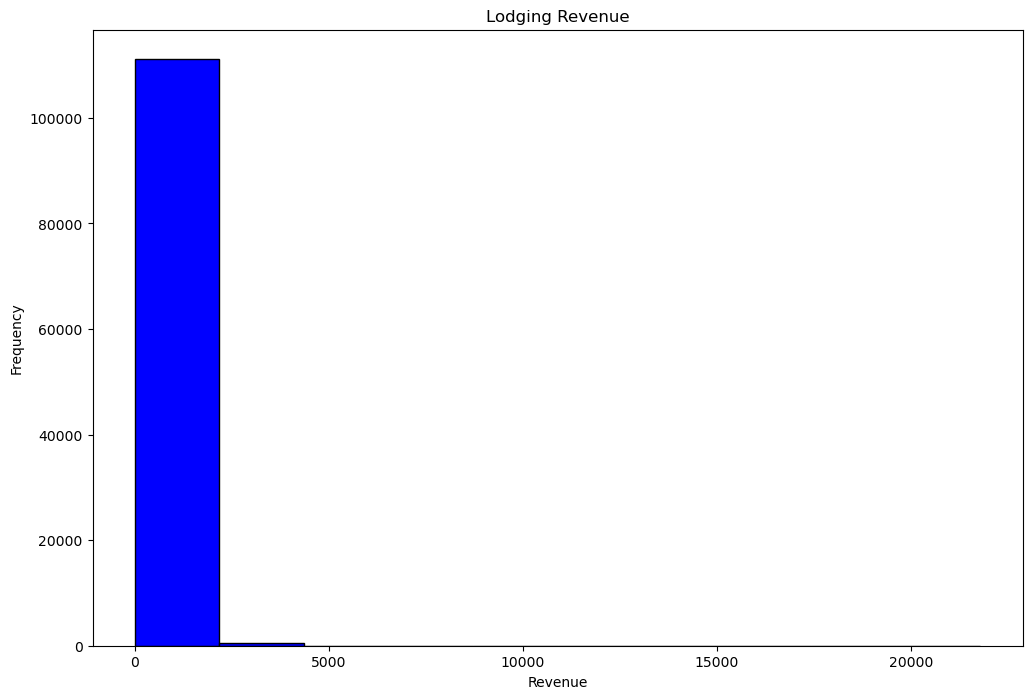

In [45]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['LodgingRevenue'], bins=10, color='blue', edgecolor='black')
plt.title('Lodging Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

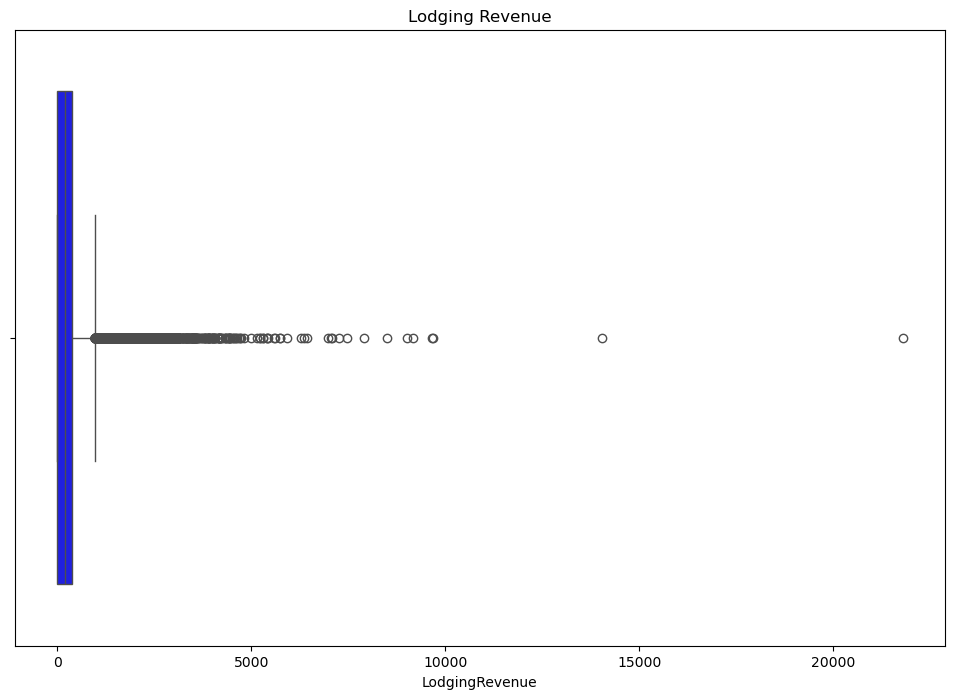

In [50]:
# creating a boxaplot to observe the distribution observtion

plt.figure(figsize=(12, 8))
sns.boxplot(x=data_num['LodgingRevenue'], color='blue')
plt.title('Lodging Revenue')
plt.show()


We have some outliers and one third of our clients have spent *0€*, these clients are probably the same than the ones without information.

#### Other Revenue

In [53]:
data_num['OtherRevenue'].value_counts()

OtherRevenue
0.00       33552
42.00       3030
14.00       2913
28.00       2328
56.00       1723
           ...  
260.20         1
1319.00        1
61.90          1
613.79         1
216.10         1
Name: count, Length: 5338, dtype: int64

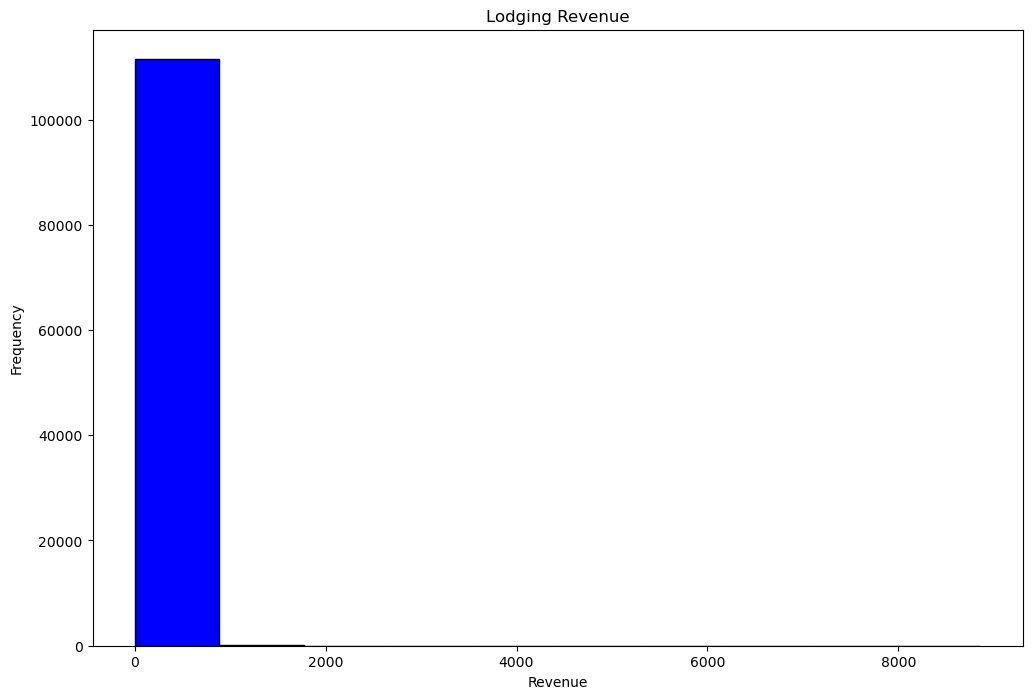

In [54]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['OtherRevenue'], bins=10, color='blue', edgecolor='black')
plt.title('Lodging Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

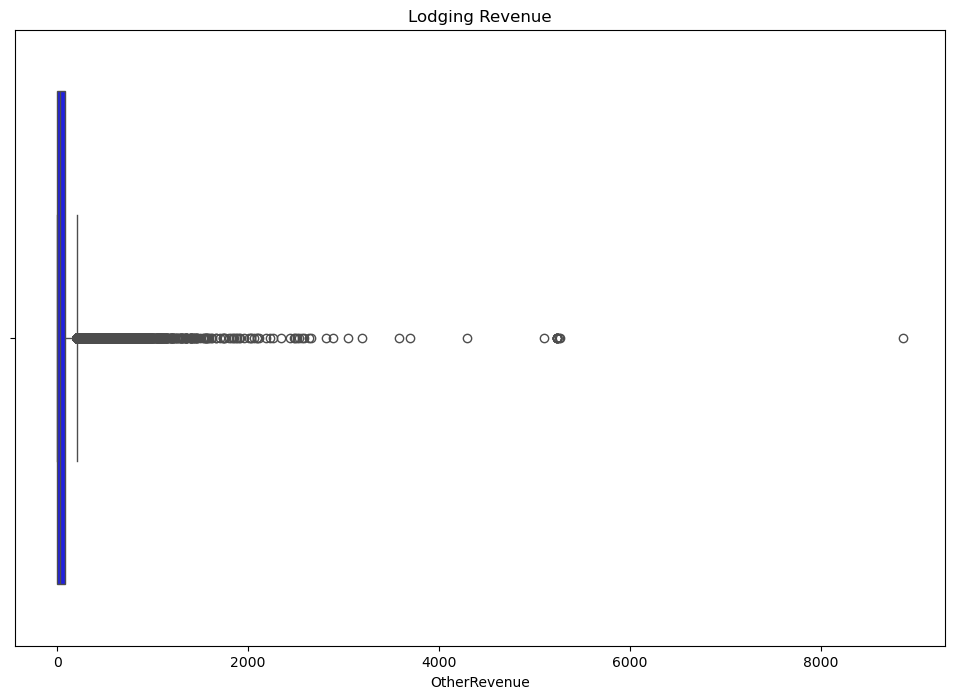

In [55]:
# creating a boxaplot to observe the distribution observtion

plt.figure(figsize=(12, 8))
sns.boxplot(x=data_num['OtherRevenue'], color='blue')
plt.title('Lodging Revenue')
plt.show()


We have a couple of customers that have spent a lot of money with us and also a third that spent zero

#### Bookings Canceled

In [57]:
data_num['BookingsCanceled'].value_counts()

BookingsCanceled
0     111567
1        125
2         19
3         11
4          8
15         1
7          1
5          1
Name: count, dtype: int64

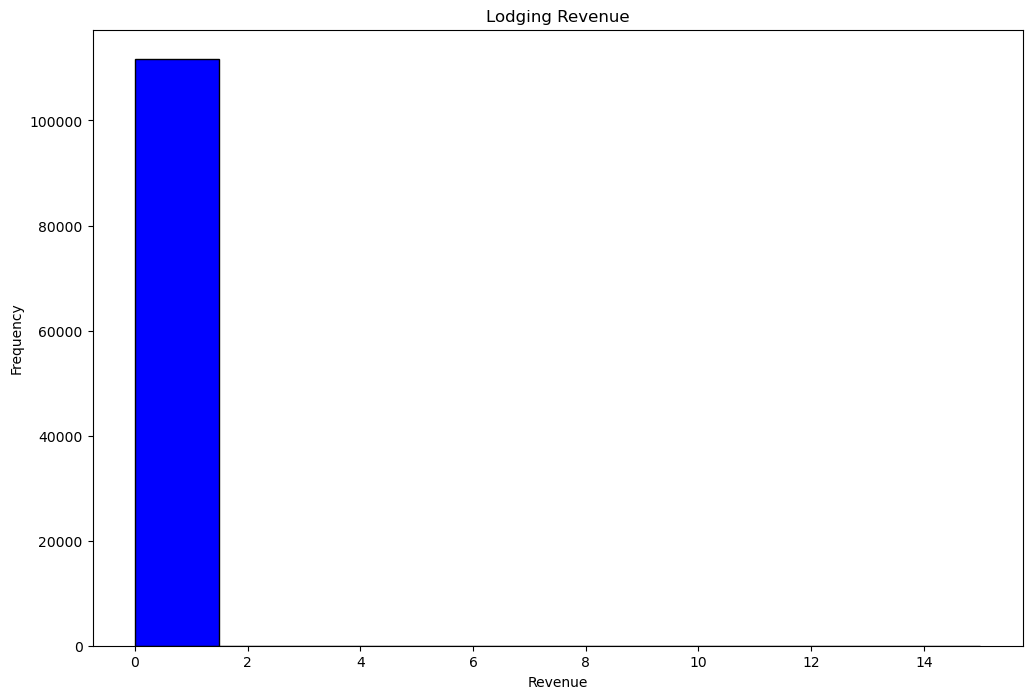

In [56]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['BookingsCanceled'], bins=10, color='blue', edgecolor='black')
plt.title('Lodging Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

The vast majority of our customers are not 'cortes'

#### Bookings No Showed

In [58]:
data_num['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    111676
1        48
2         8
3         1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

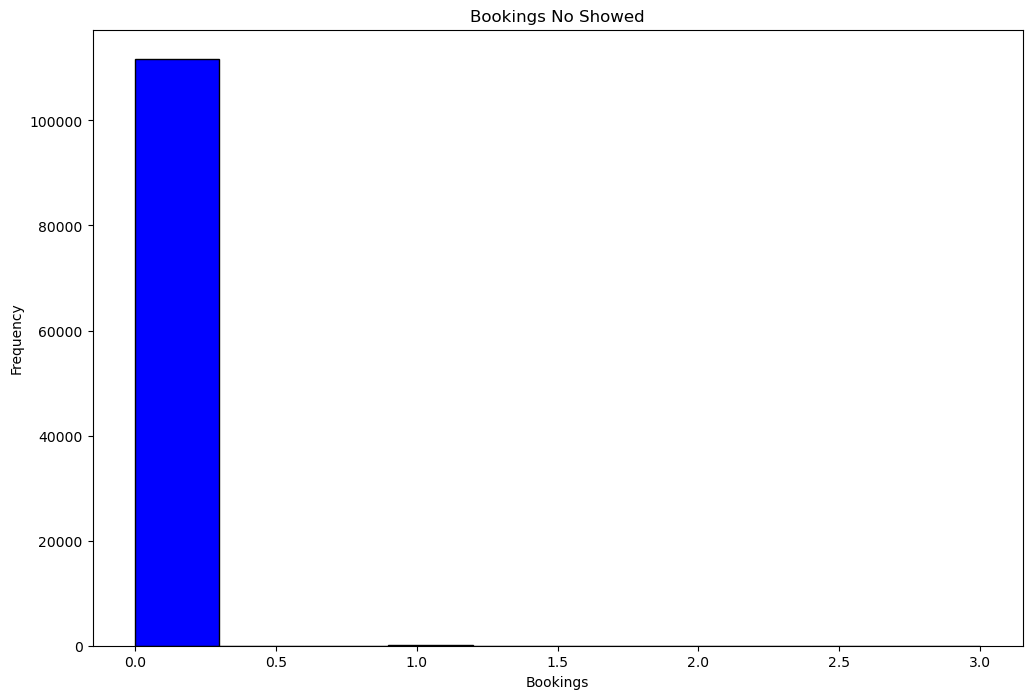

In [59]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['BookingsNoShowed'], bins=10, color='blue', edgecolor='black')
plt.title('Bookings No Showed')
plt.xlabel('Bookings')
plt.ylabel('Frequency')

Like in the lst feature our customers are good people

#### Bookings Checked In 

In [60]:
data_num['BookingsCheckedIn'].value_counts()

BookingsCheckedIn
1     76474
0     33198
2      1634
3       201
4        57
5        33
7        30
6        19
9        13
8        12
10       12
15        7
11        7
16        5
13        5
20        4
12        3
29        2
26        2
18        2
40        1
22        1
24        1
19        1
25        1
14        1
23        1
76        1
66        1
32        1
17        1
38        1
35        1
Name: count, dtype: int64

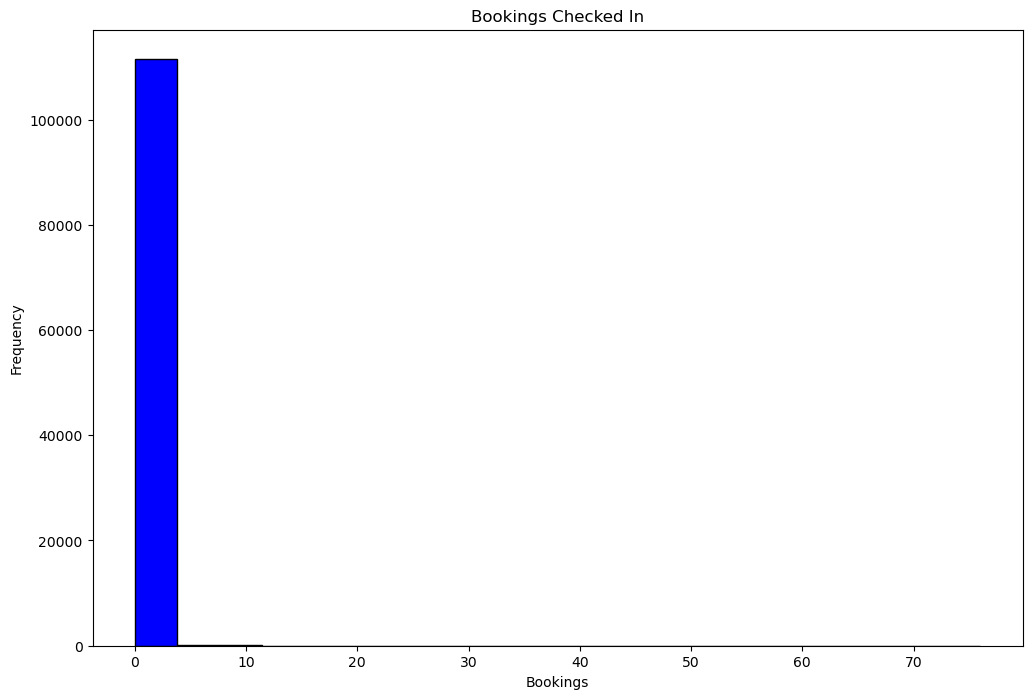

In [64]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['BookingsCheckedIn'], bins=20, color='blue', edgecolor='black')
plt.title('Bookings Checked In')
plt.xlabel('Bookings')
plt.ylabel('Frequency')
plt.show()

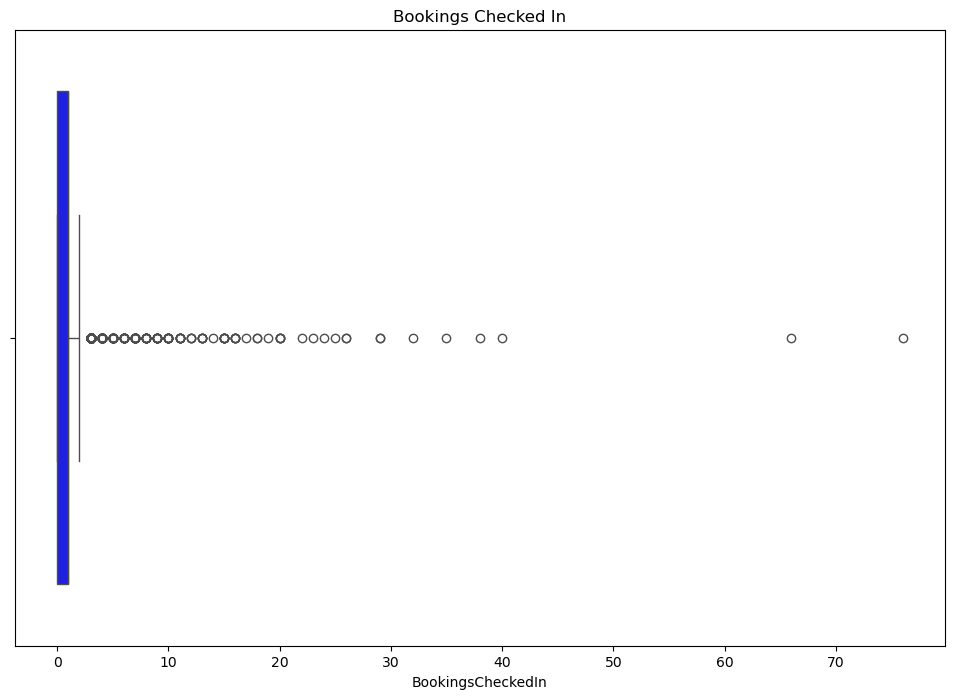

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data_num['BookingsCheckedIn'], color='blue')
plt.title('Bookings Checked In')
plt.show()

two thirds of our customers have been in our hotel only once

#### Persons Night
(adults + children)*number of nights 

In [67]:
data_num['PersonsNights'].value_counts()

PersonsNights
0      33202
6      16328
4      12926
2      11815
8      10245
1       5147
3       4964
10      4296
12      3931
9       2253
14      1845
5       1116
15       864
16       659
18       492
21       412
7        291
20       276
24       161
28        91
30        53
22        51
11        45
27        41
32        24
26        23
13        22
33        21
36        21
17        18
19        14
25        12
42         9
23         8
35         7
40         6
34         5
39         5
44         4
48         3
38         3
45         2
29         2
31         2
68         2
51         2
80         1
59         1
91         1
37         1
57         1
41         1
49         1
52         1
116        1
56         1
99         1
75         1
62         1
60         1
Name: count, dtype: int64

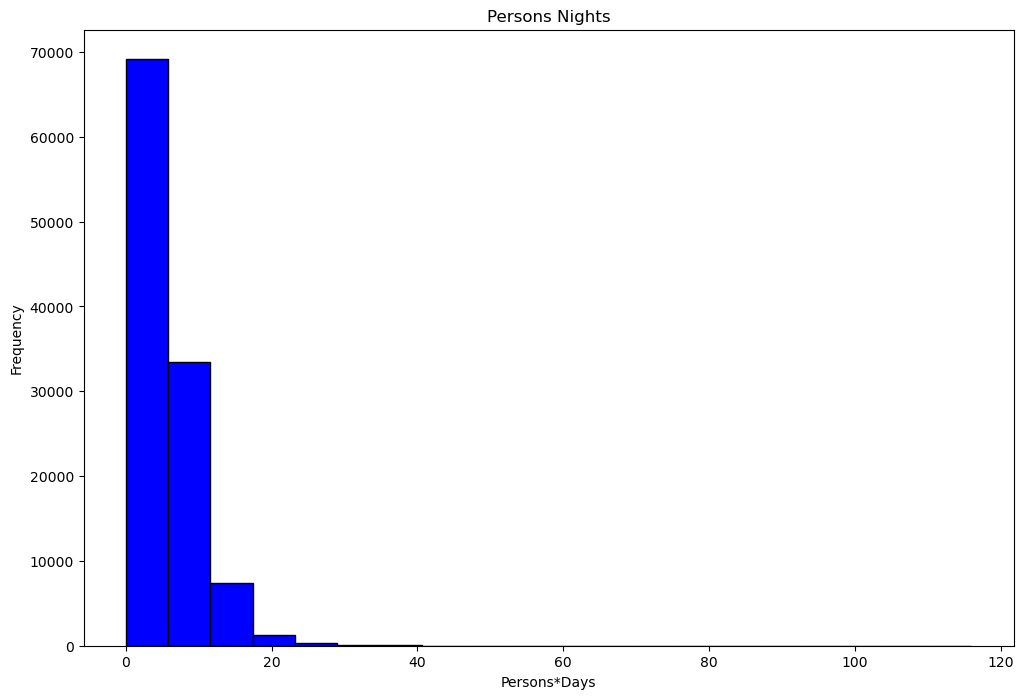

In [68]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['PersonsNights'], bins=20, color='blue', edgecolor='black')
plt.title('Persons Nights')
plt.xlabel('Persons*Days')
plt.ylabel('Frequency')
plt.show()

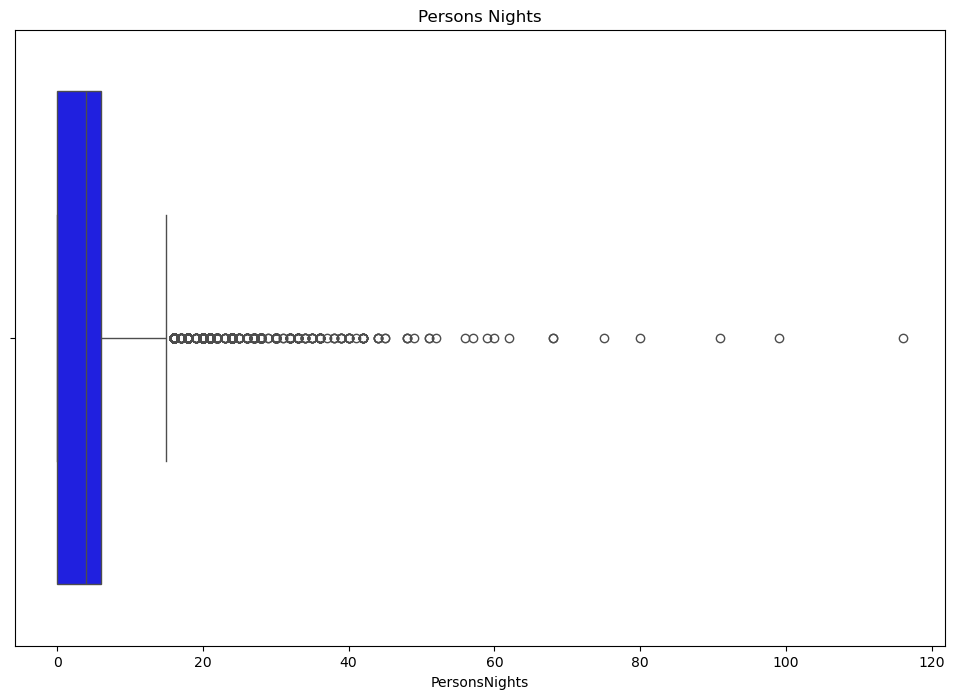

In [69]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data_num['PersonsNights'], color='blue')
plt.title('Persons Nights')
plt.show()

Not really sure how to interprect this, reflet during the sleep

Nota: Deve existir uma forma de chegar ao numero de pessoas ou dias

#### Room Nights

Number of rooms * number of nights

In [70]:
data_num['RoomNights'].value_counts()

RoomNights
0      33198
3      20706
2      17484
4      14050
1      13665
5       6248
7       2570
6       2424
8        505
9        271
10       199
11        97
12        71
14        53
15        36
13        34
19        14
17        13
16        13
21        12
18        10
22         8
26         6
24         4
28         4
32         3
20         3
31         3
42         2
40         2
33         2
37         2
39         2
88         2
51         2
36         2
25         1
48         1
49         1
27         1
95         1
35         1
30         1
185        1
34         1
23         1
29         1
116        1
59         1
Name: count, dtype: int64

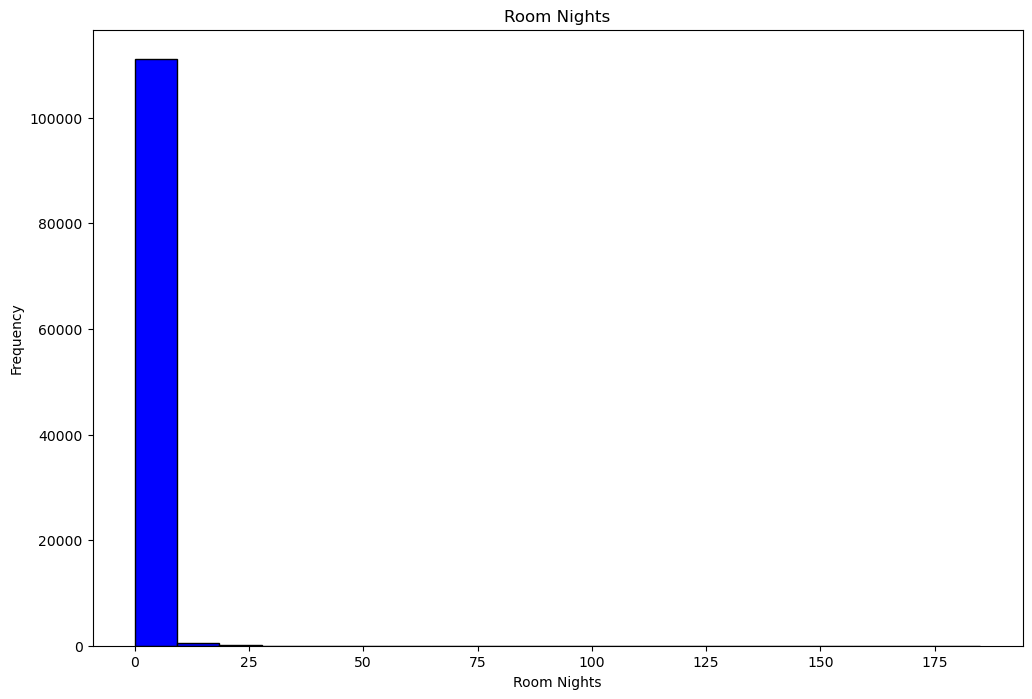

In [71]:
plt.figure(figsize=(12, 8))
plt.hist(data_num['RoomNights'], bins=20, color='blue', edgecolor='black')
plt.title('Room Nights')
plt.xlabel('Room Nights')
plt.ylabel('Frequency')
plt.show()

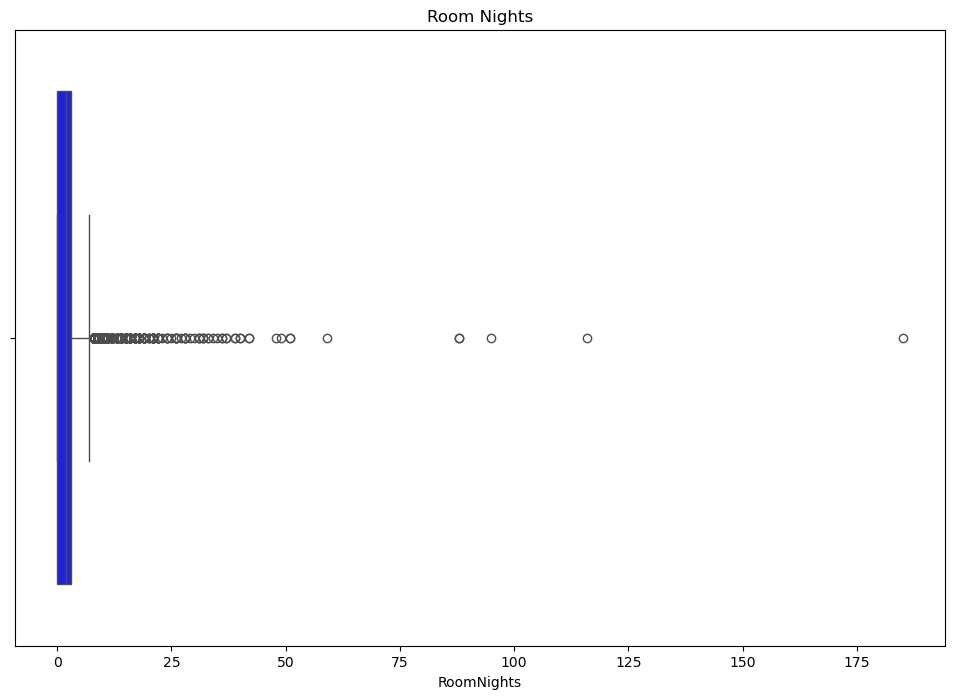

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data_num['RoomNights'], color='blue')
plt.title('Room Nights')
plt.show()

Pensar melhor sobre isto

In [66]:
data_num.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights'],
      dtype='object')

### Correlation between features

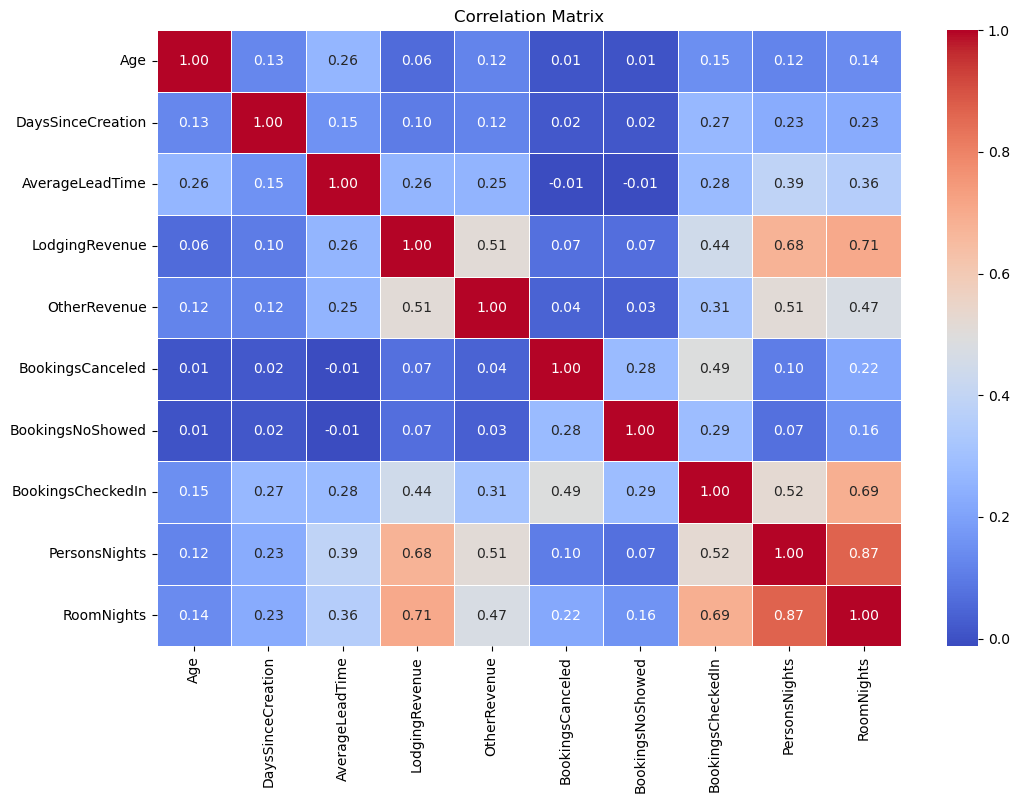

In [39]:
# Visual of a correlation matrix

corr = data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()